In [1]:
import awkward as ak
import numpy as np
from hist import Hist
import matplotlib.pyplot as plt
import mplhep as hep
import pickle
import math

plt.rcParams.update({"font.size": 16})
plt.style.use(hep.style.CMS)

In [8]:
with open("../../outfiles/0--1.pkl", "rb") as filehandler:
    outs = pickle.load(filehandler)

In [10]:
outs["num"][:, sum, :, :]

Hist(
  Variable([0, 0.9, 0.95, 0.98, 1], name='jet1txbb', label='$T_{Xbb}$ Score'),
  Regular(50, 0, 1000, name='jet1pt', label='$p_T$ (GeV)'),
  Regular(15, 0, 300, name='jet1msd', label='$m_{SD}$ (GeV)'),
  storage=Double()) # Sum: 106.0 (110.0 with flow)

In [13]:
effstxbb = outs["num"][:, sum, :, :] / outs["den"][:, sum, :, :]
effsth4q = outs["num"][sum, :, :, :] / outs["den"][sum, :, :, :]

In [15]:
jet1txbbbins

array([0.  , 0.9 , 0.95, 0.98, 1.  ])

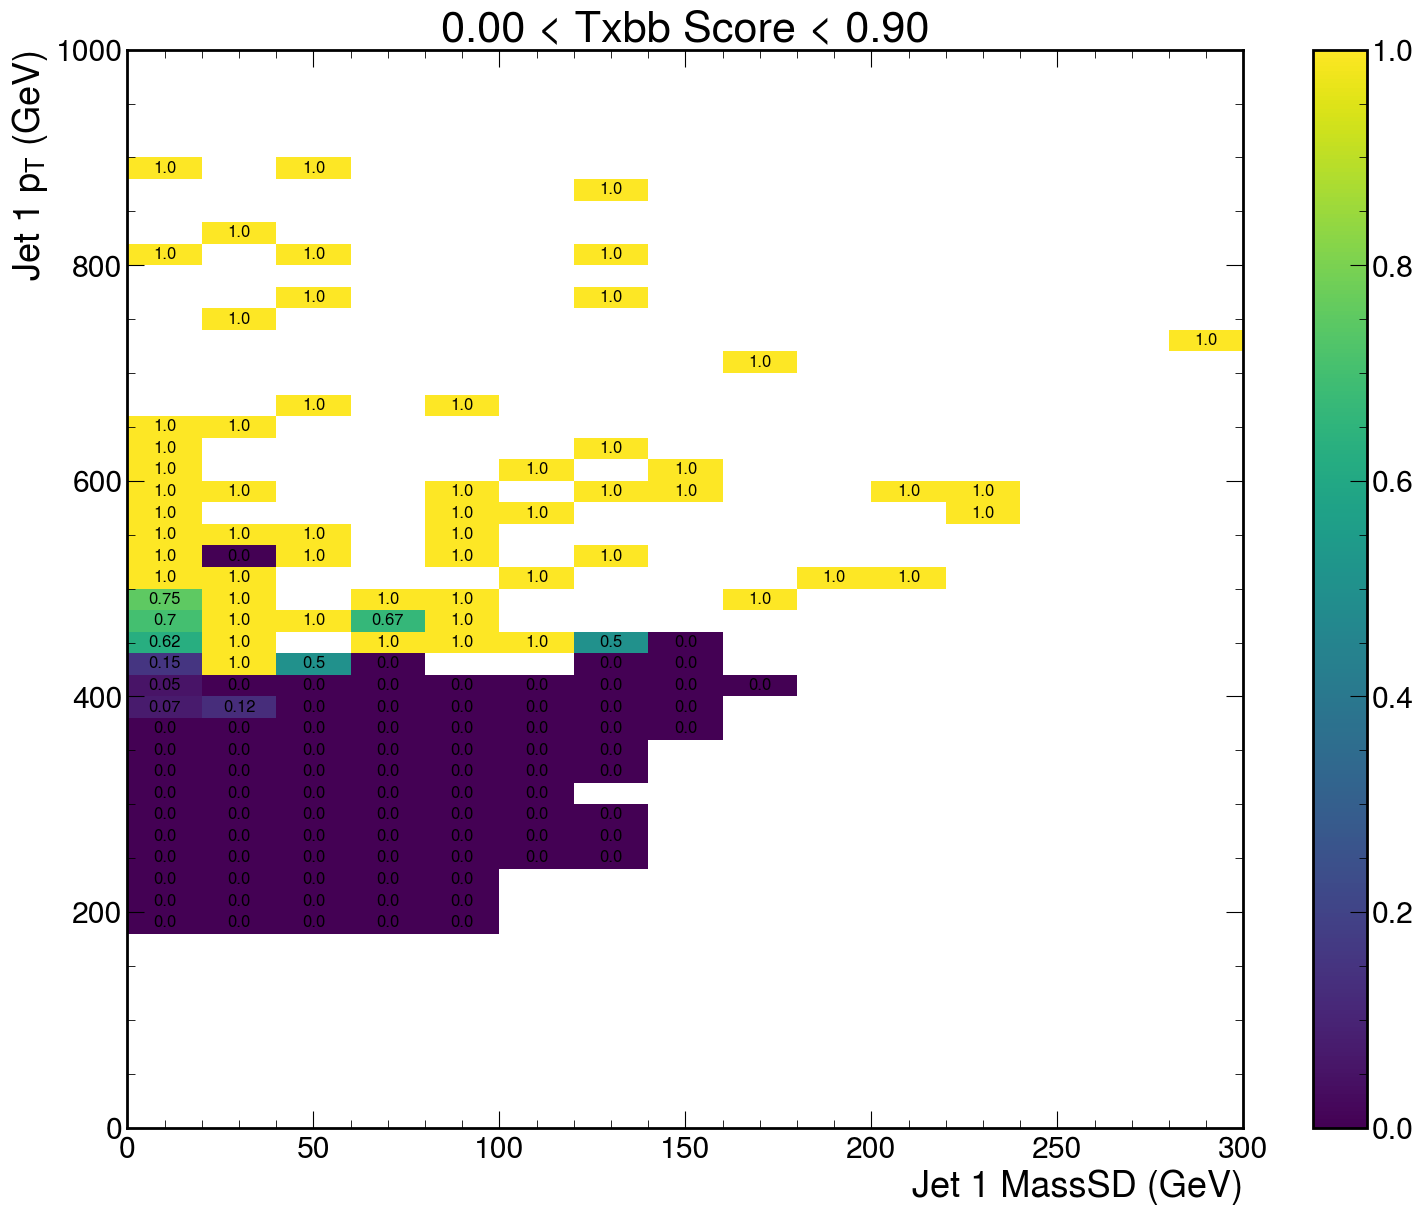

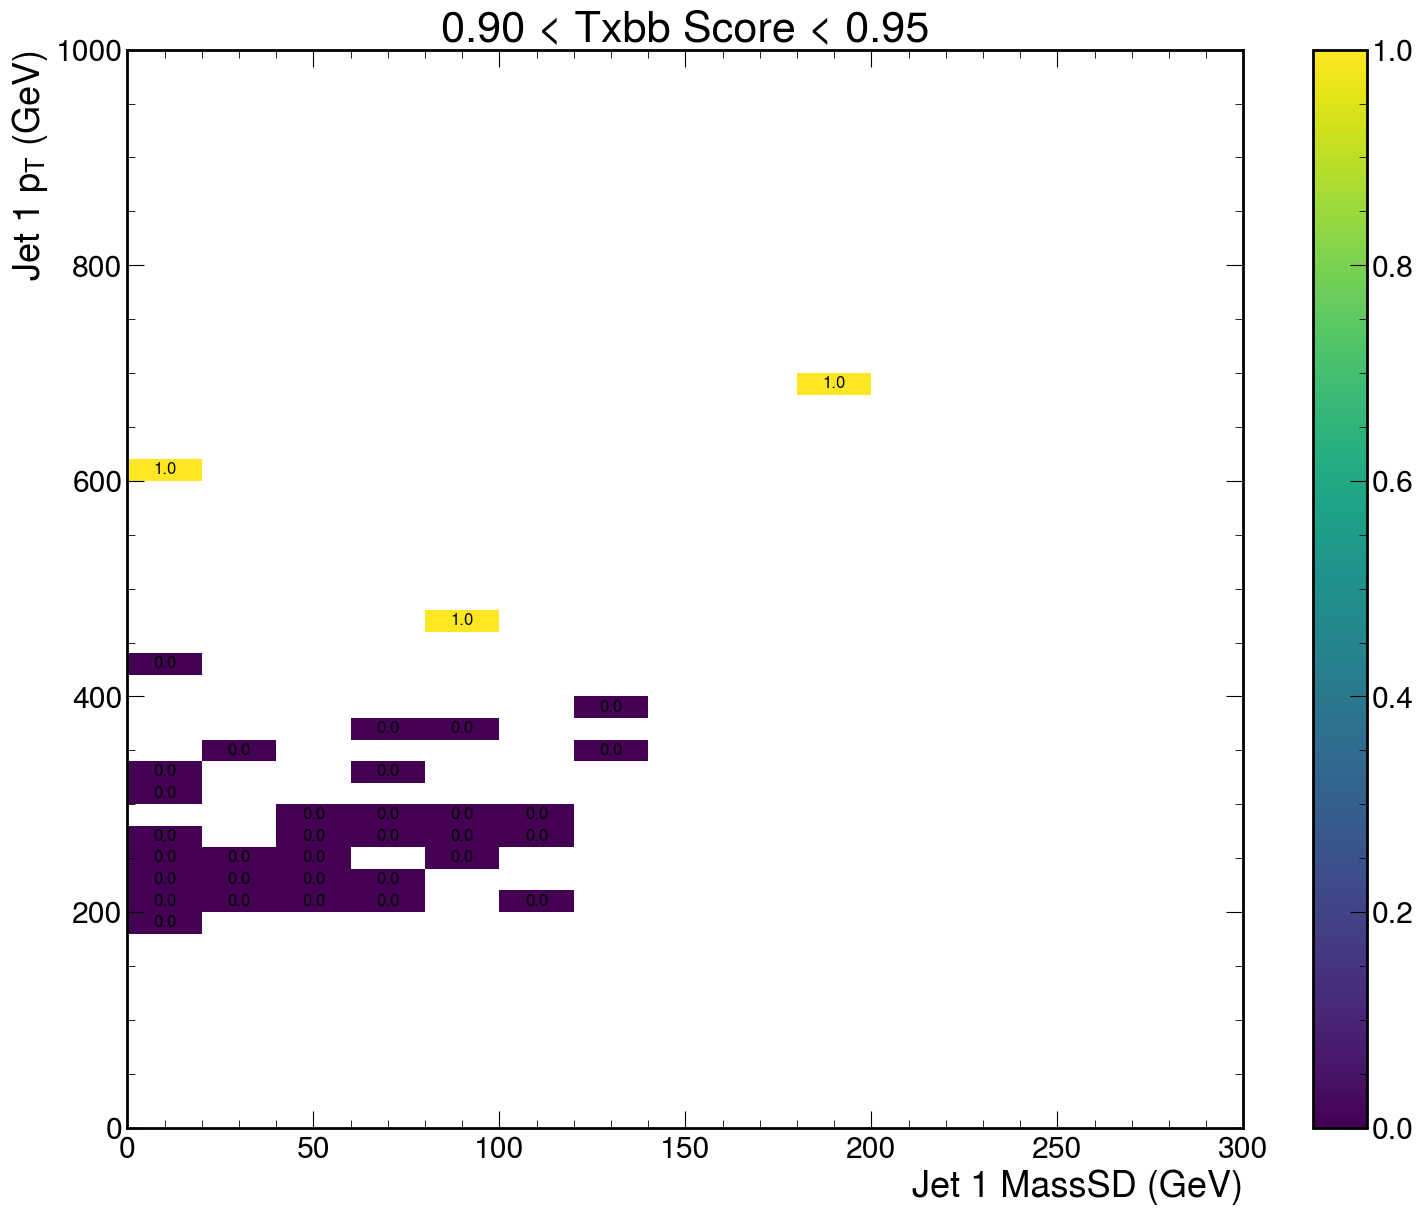

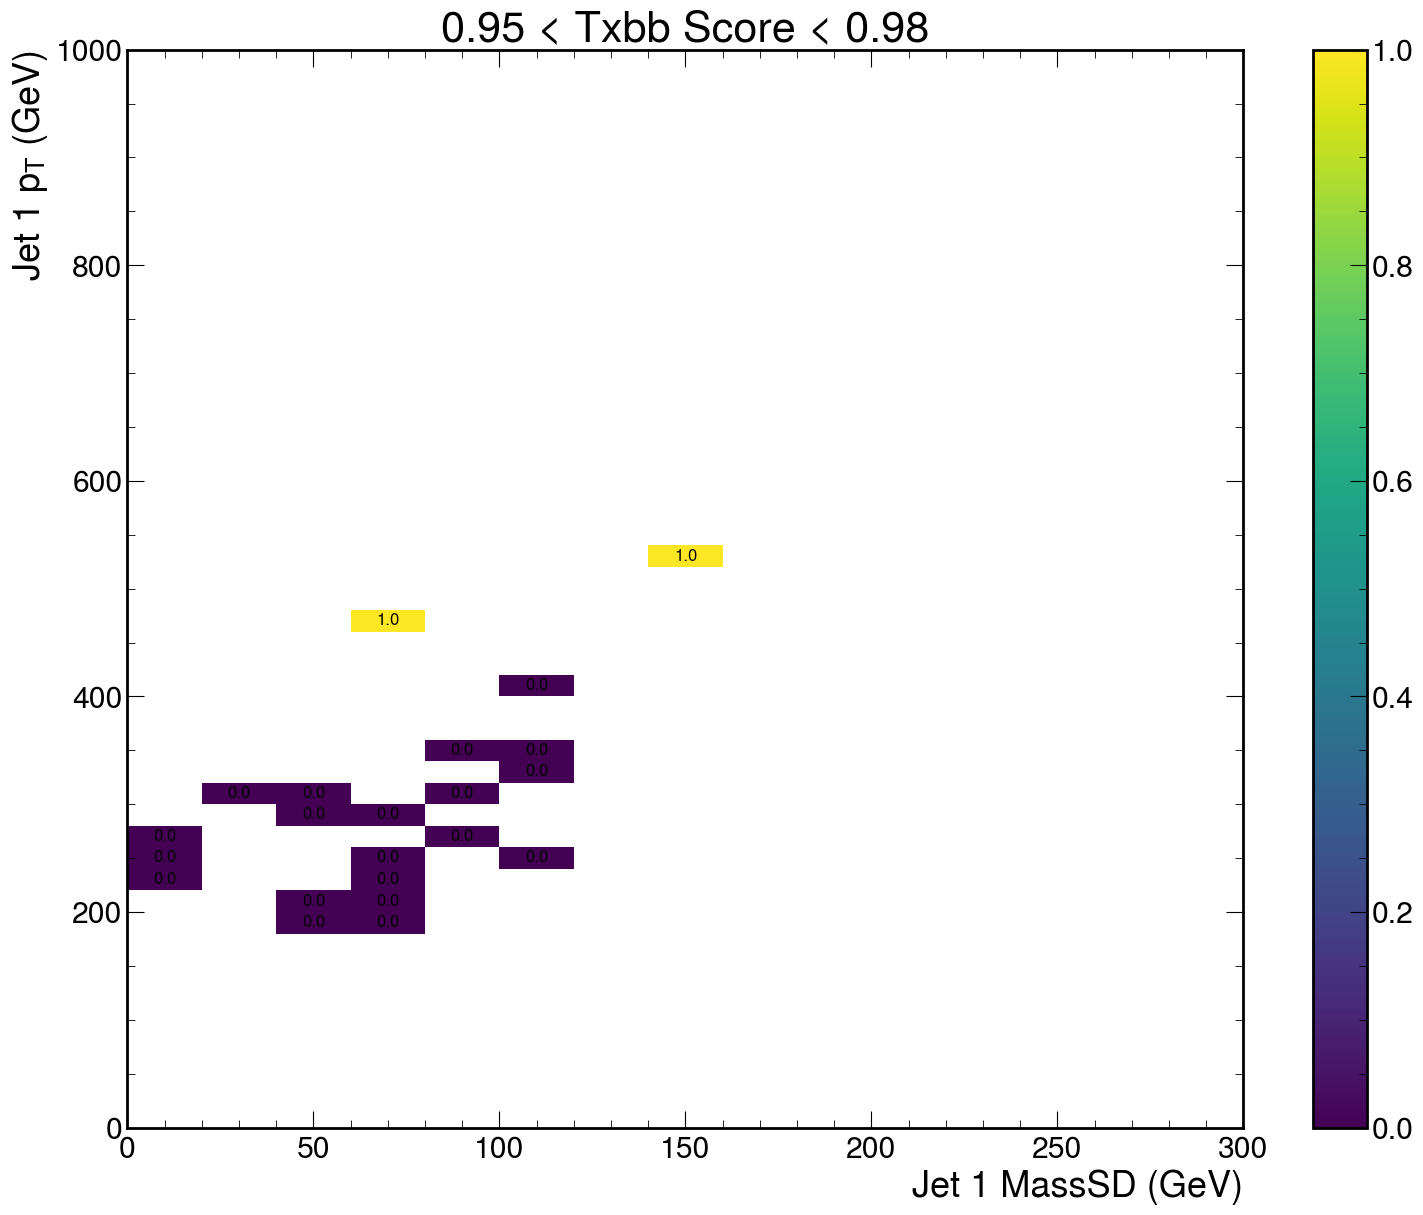

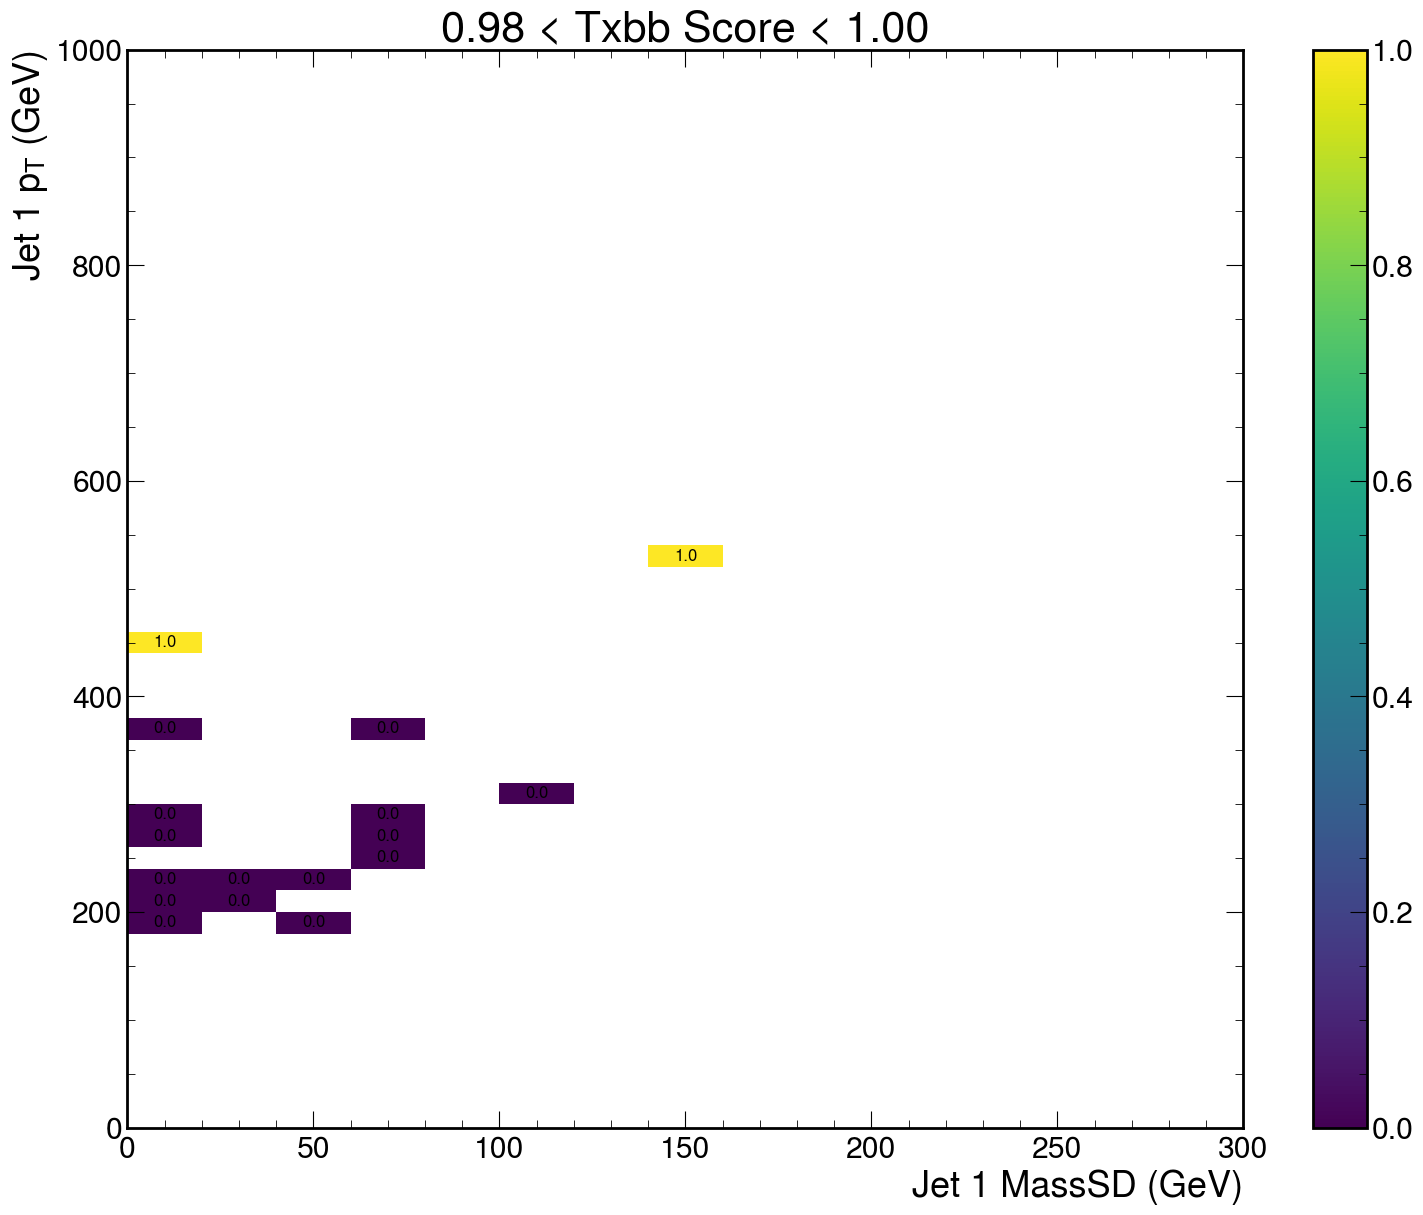

In [17]:
w, jet1txbbbins, jet1ptbins, jet1msdbins = effstxbb.to_numpy()

for k in range(len(jet1txbbbins) - 1):
    fig, ax = plt.subplots(figsize=(18, 14))
    mesh = ax.pcolormesh(jet1msdbins, jet1ptbins, w[k], cmap="viridis", vmin=0, vmax=1)
    for i in range(len(jet1ptbins) - 1):
        for j in range(len(jet1msdbins) - 1):
            if not math.isnan(w[k][i, j]):
                ax.text(
                    (jet1msdbins[j] + jet1msdbins[j + 1]) / 2,
                    (jet1ptbins[i] + jet1ptbins[i + 1]) / 2,
                    w[k][i, j].round(2),
                    color="black",
                    ha="center",
                    va="center",
                    fontsize=12,
                )

    ax.set_title(f"{jet1txbbbins[k]:.2f} < Txbb Score < {jet1txbbbins[k + 1]:.2f}")
    ax.set_xlabel("Jet 1 MassSD (GeV)")
    ax.set_ylabel("Jet 1 $p_T$ (GeV)")
    plt.colorbar(mesh, ax=ax)
    # plt.savefig(f"../corrections/trigEffs/Hybrid3D/AK15Hybrid3DTriggerEfficiencies_Bin{k}.pdf")

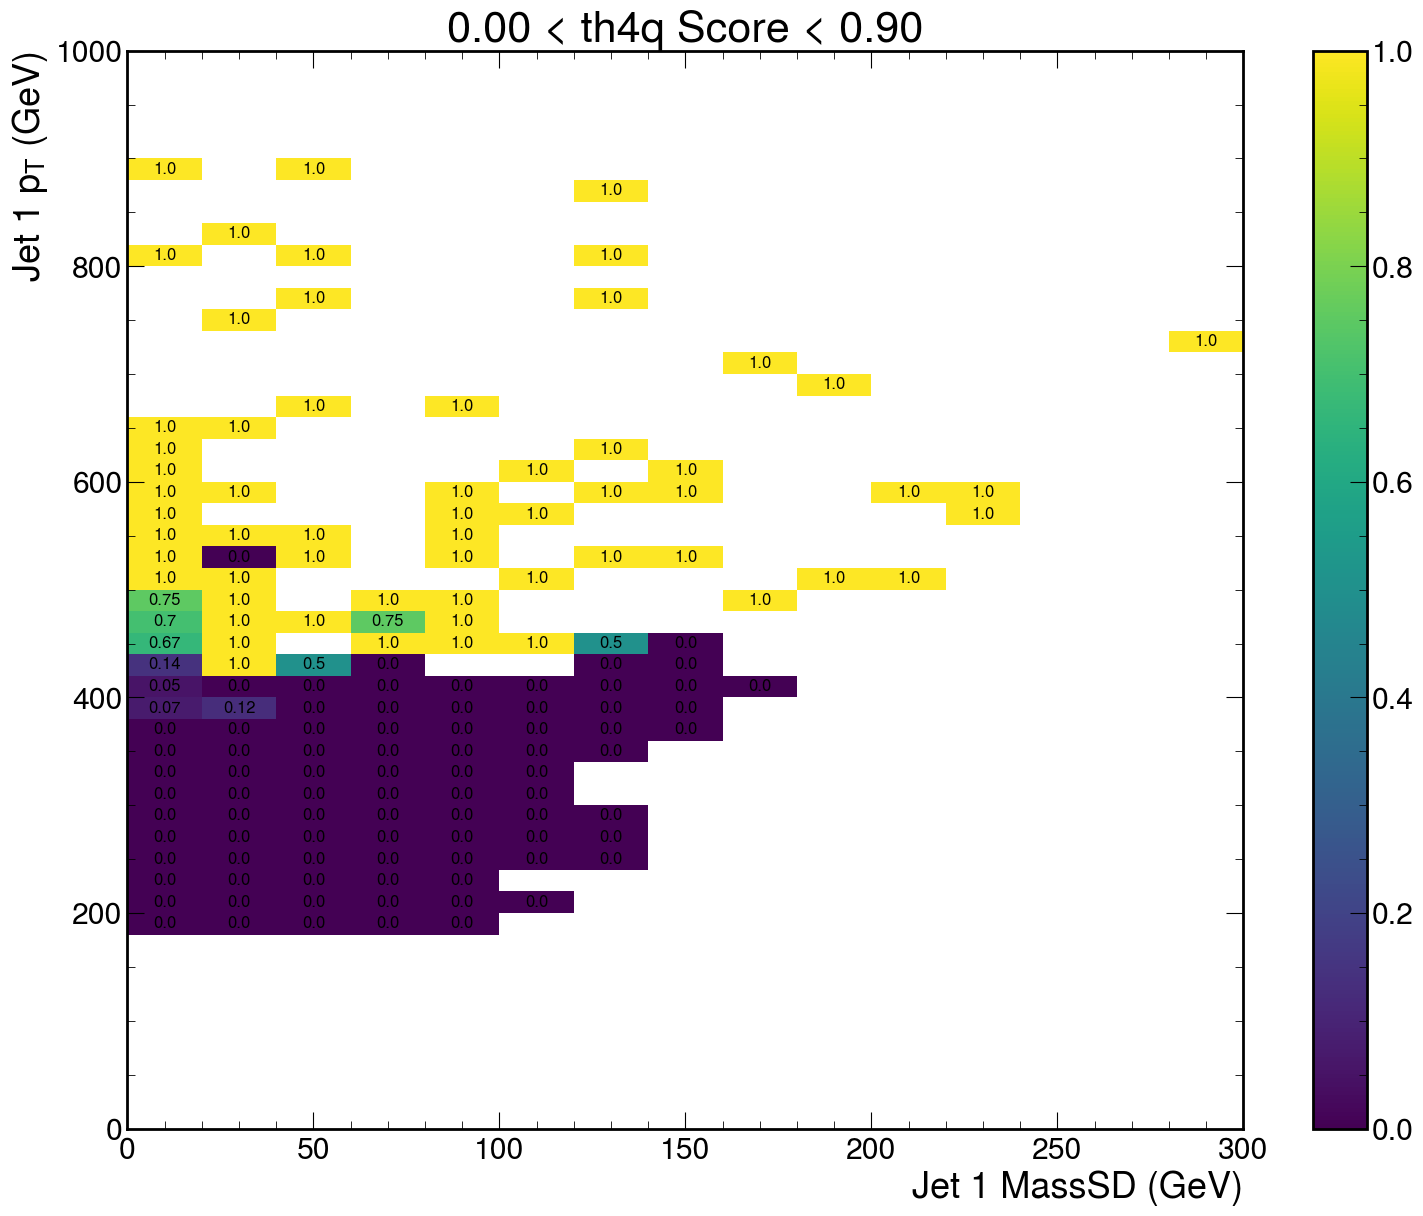

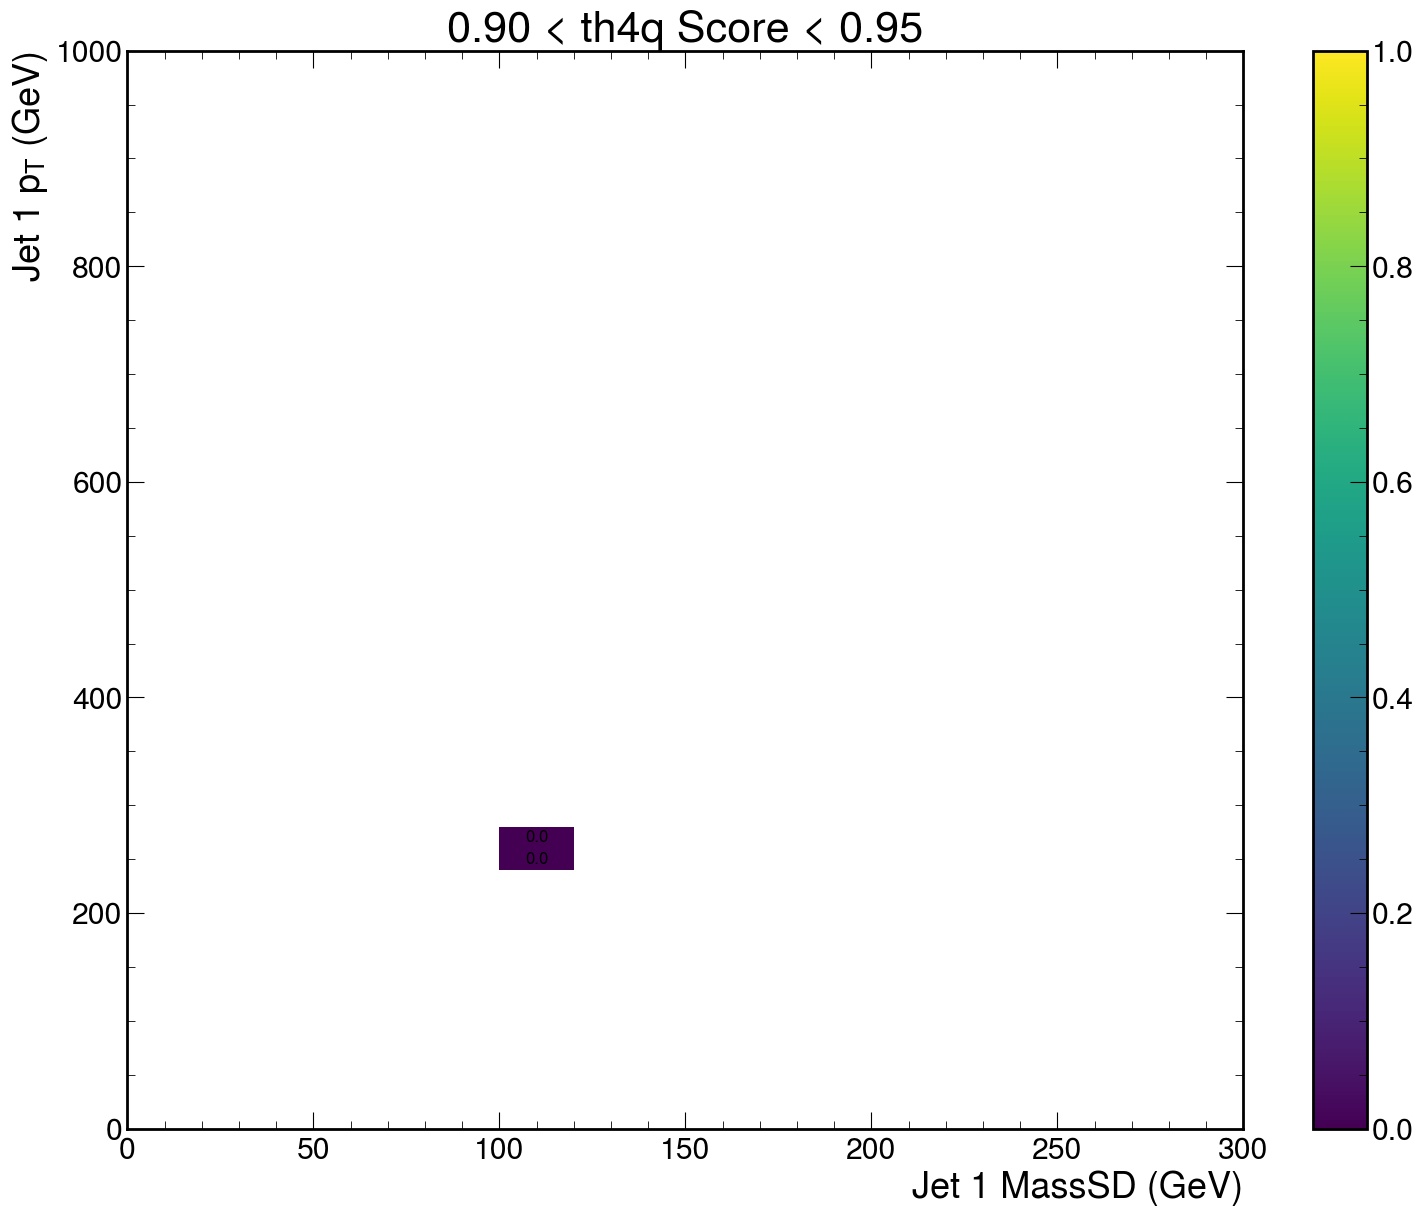

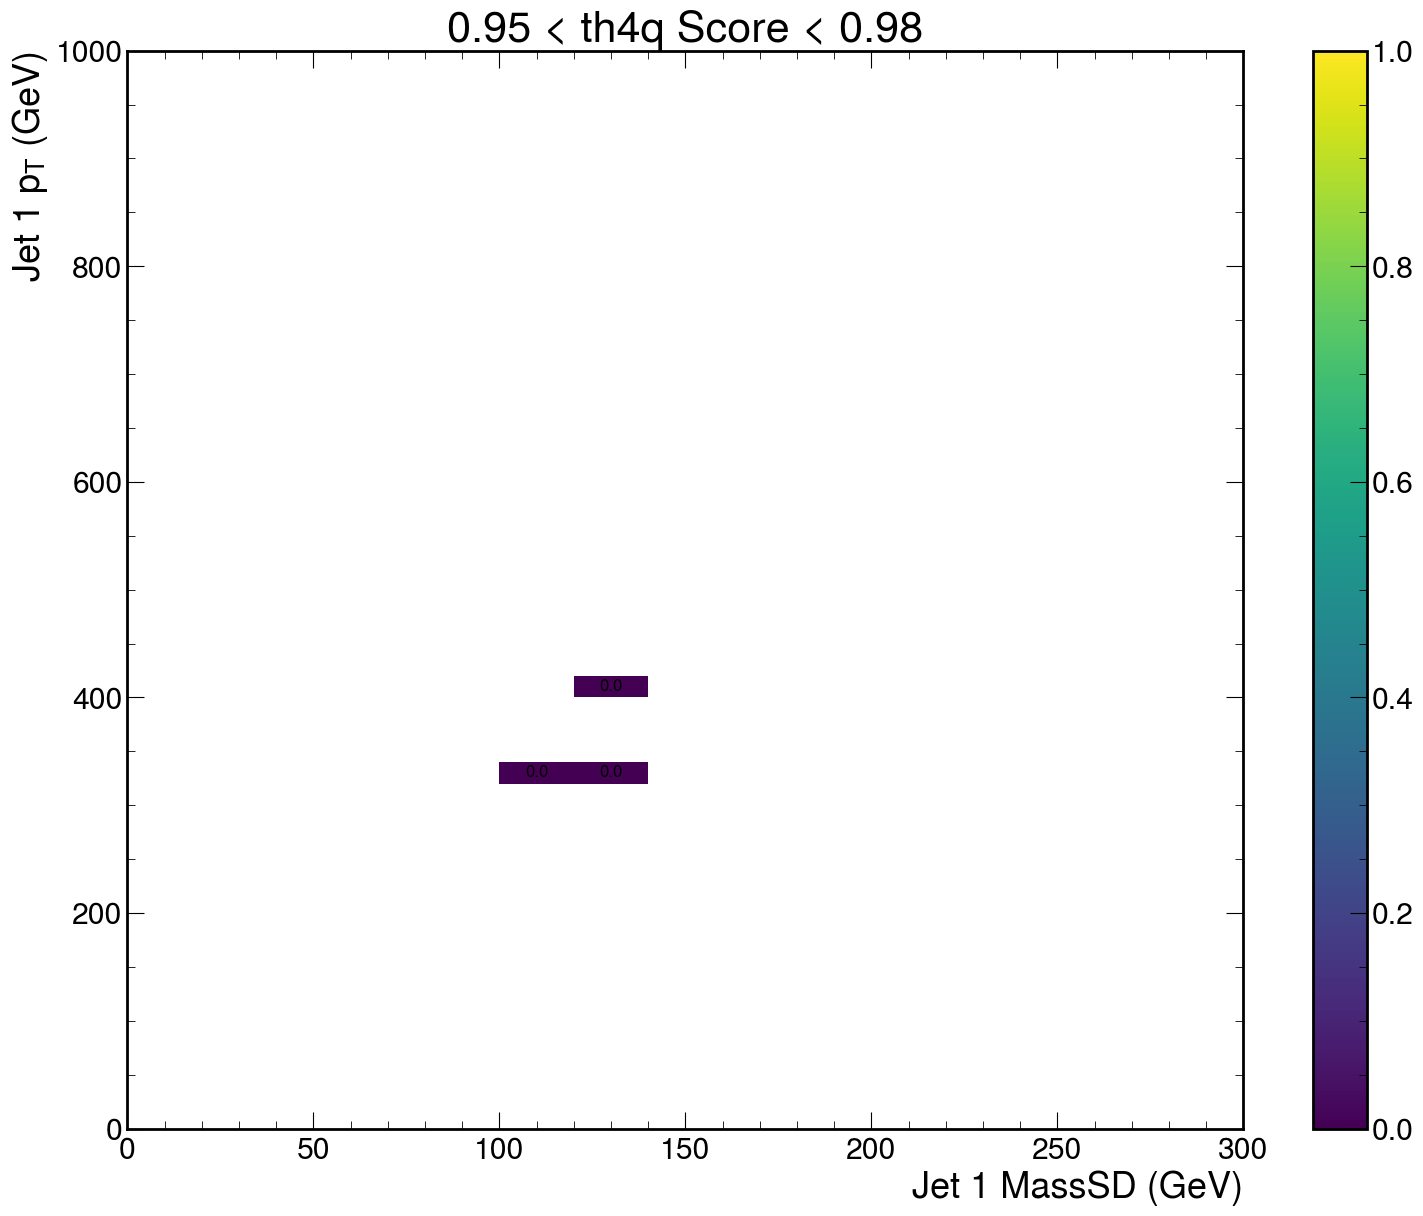

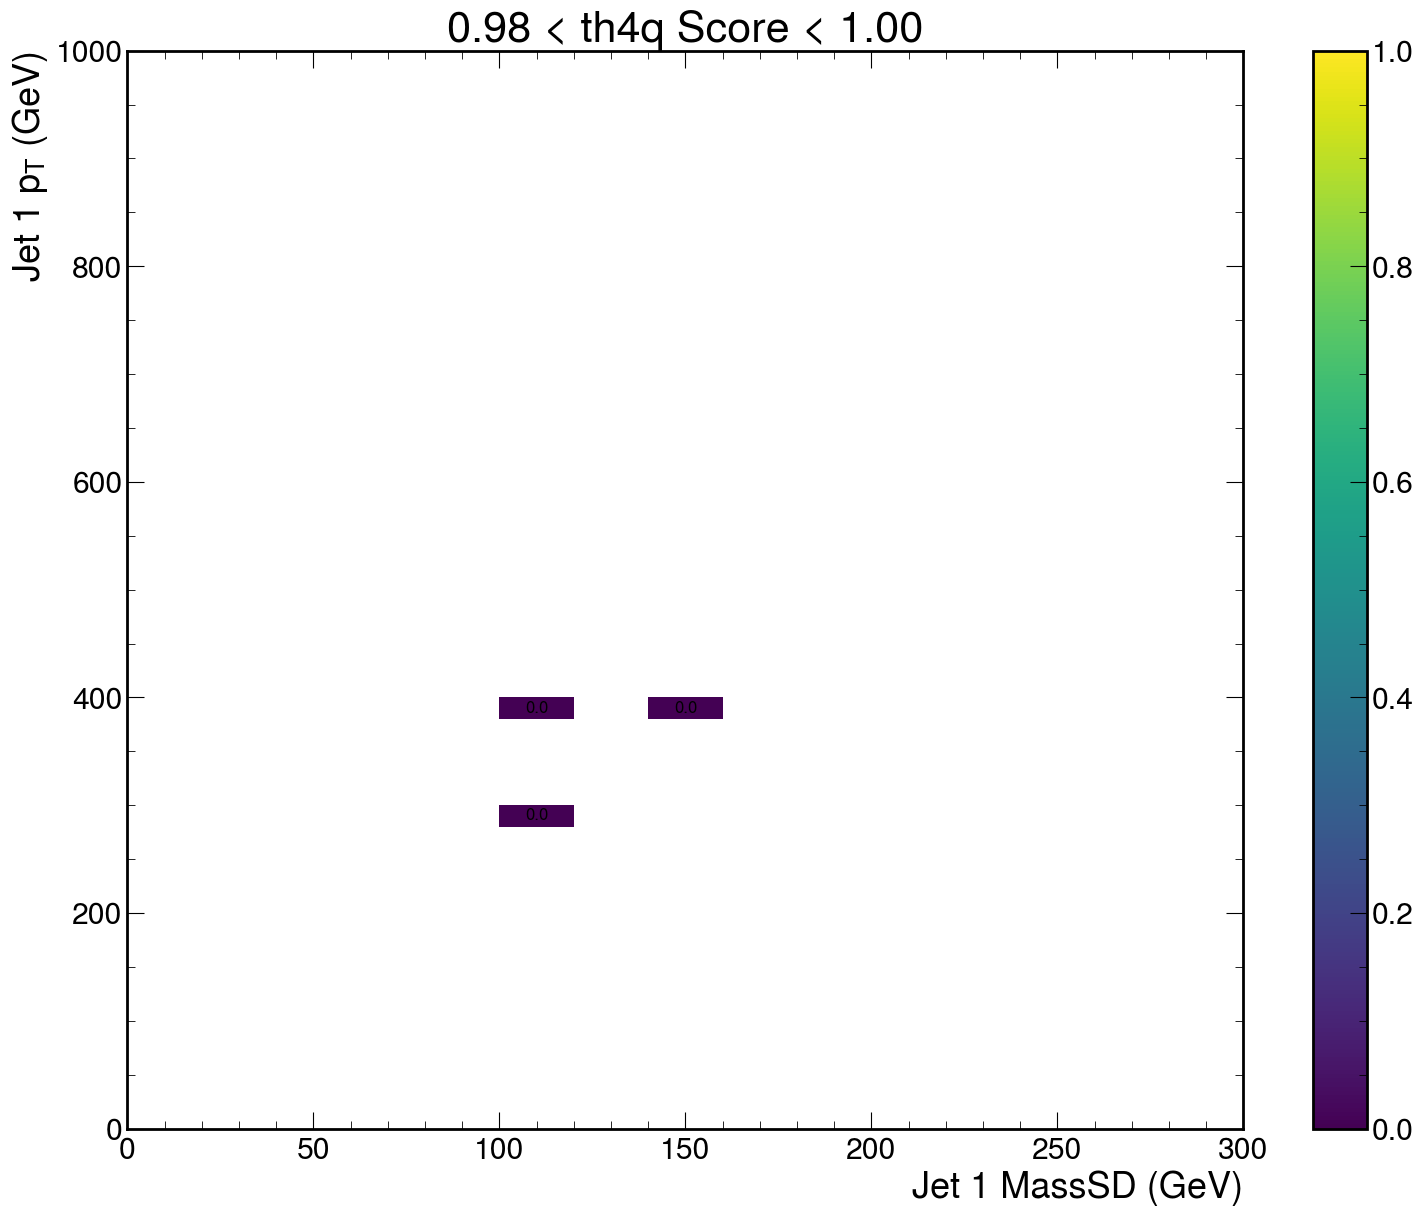

In [18]:
w, jet1th4qbins, jet1ptbins, jet1msdbins = effsth4q.to_numpy()

for k in range(len(jet1th4qbins) - 1):
    fig, ax = plt.subplots(figsize=(18, 14))
    mesh = ax.pcolormesh(jet1msdbins, jet1ptbins, w[k], cmap="viridis", vmin=0, vmax=1)
    for i in range(len(jet1ptbins) - 1):
        for j in range(len(jet1msdbins) - 1):
            if not math.isnan(w[k][i, j]):
                ax.text(
                    (jet1msdbins[j] + jet1msdbins[j + 1]) / 2,
                    (jet1ptbins[i] + jet1ptbins[i + 1]) / 2,
                    w[k][i, j].round(2),
                    color="black",
                    ha="center",
                    va="center",
                    fontsize=12,
                )

    ax.set_title(f"{jet1th4qbins[k]:.2f} < th4q Score < {jet1th4qbins[k + 1]:.2f}")
    ax.set_xlabel("Jet 1 MassSD (GeV)")
    ax.set_ylabel("Jet 1 $p_T$ (GeV)")
    plt.colorbar(mesh, ax=ax)
    # plt.savefig(f"../corrections/trigEffs/Hybrid3D/AK15Hybrid3DTriggerEfficiencies_Bin{k}.pdf")

In [12]:
with open(
    "../corrections/trigEffs/AK15JetHTHybrid3DTriggerEfficiency_2017.hist", "rb"
) as filehandler:
    effs = pickle.load(filehandler)

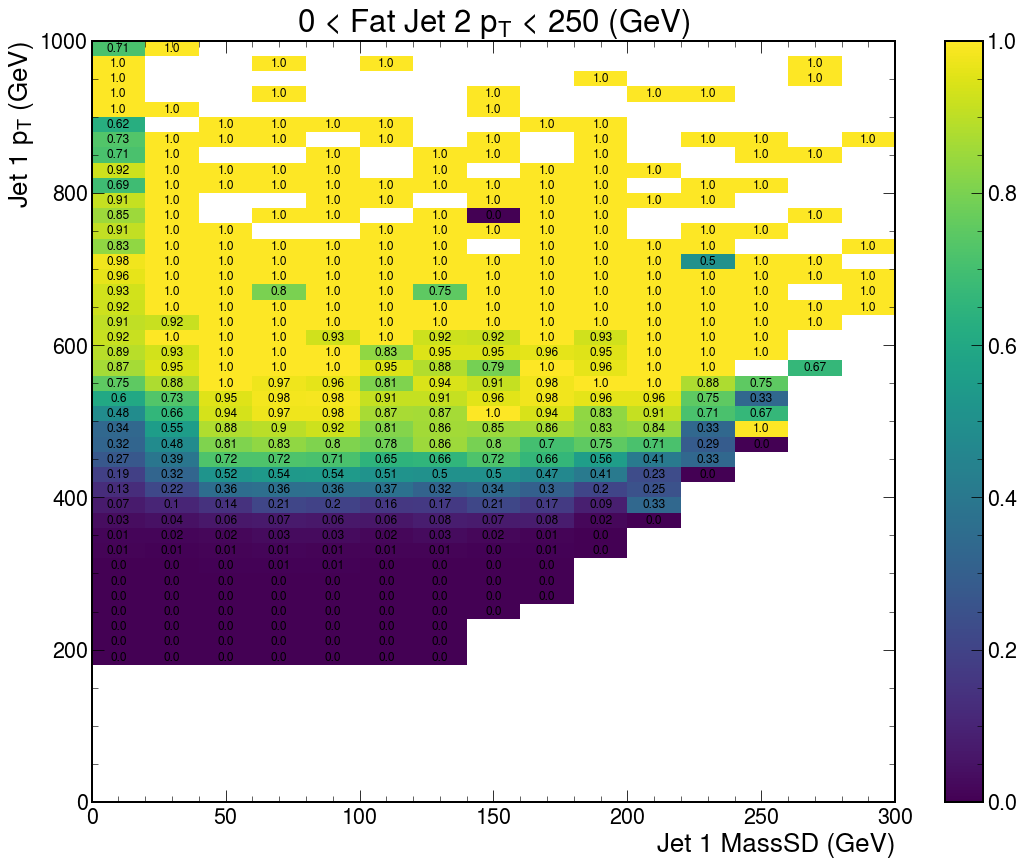

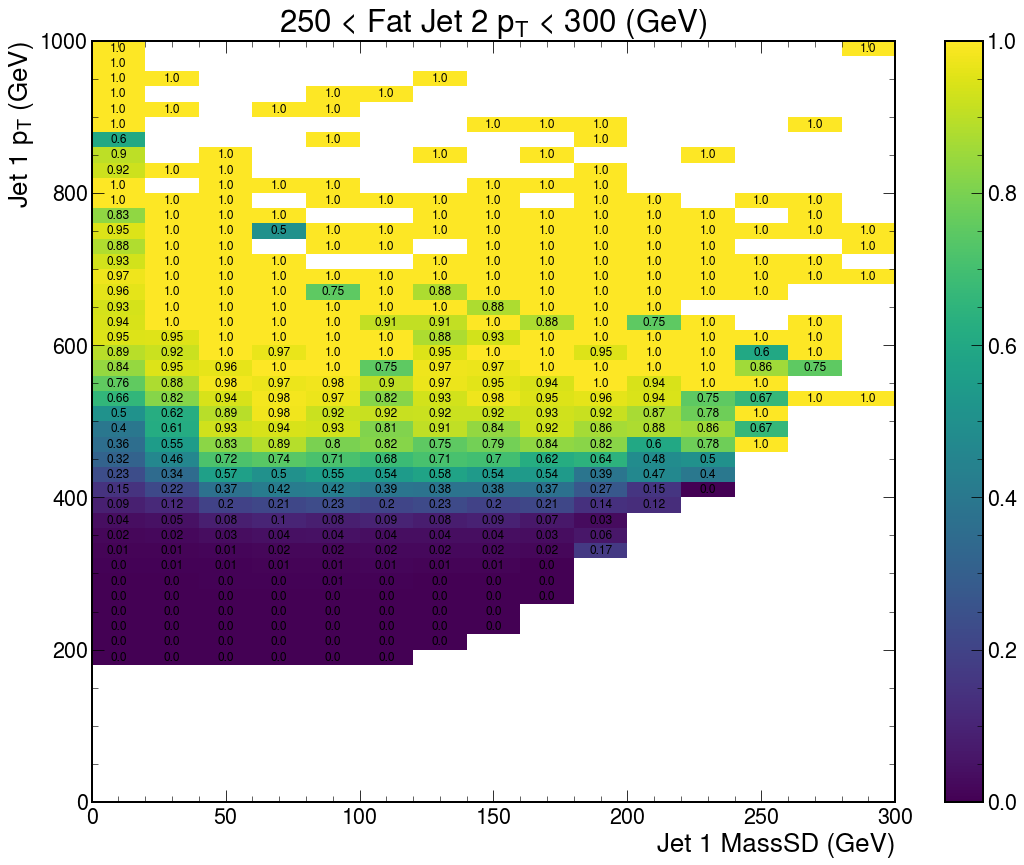

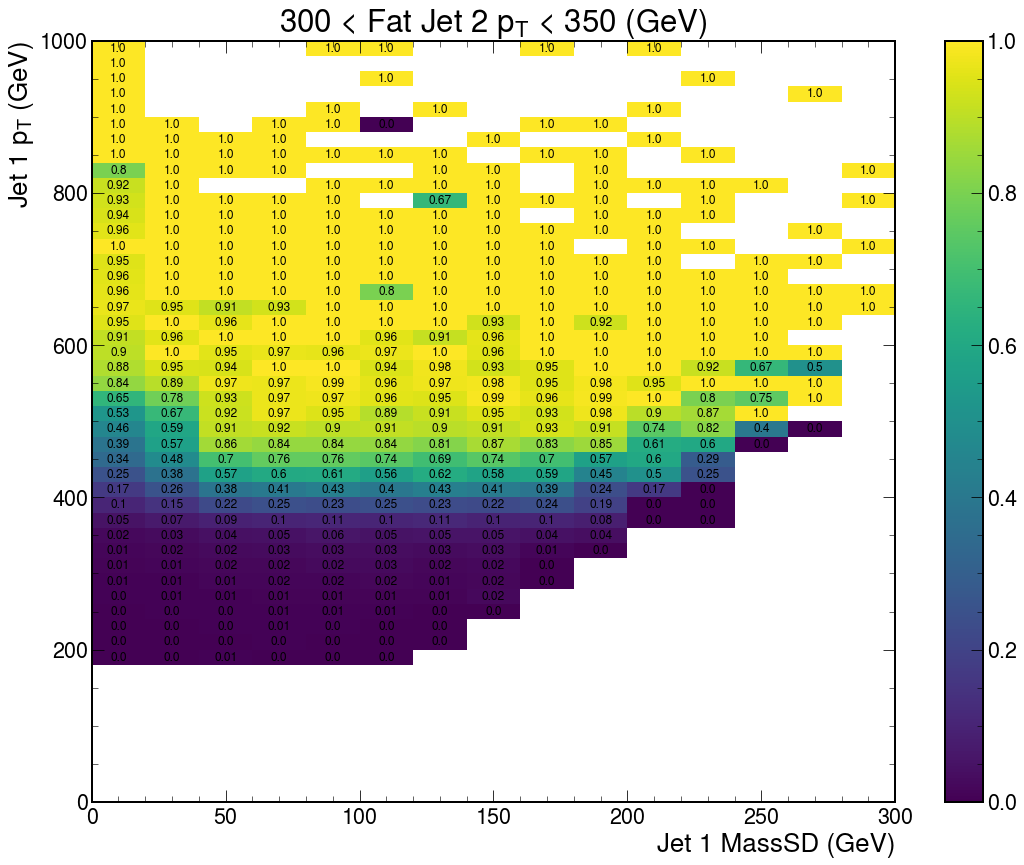

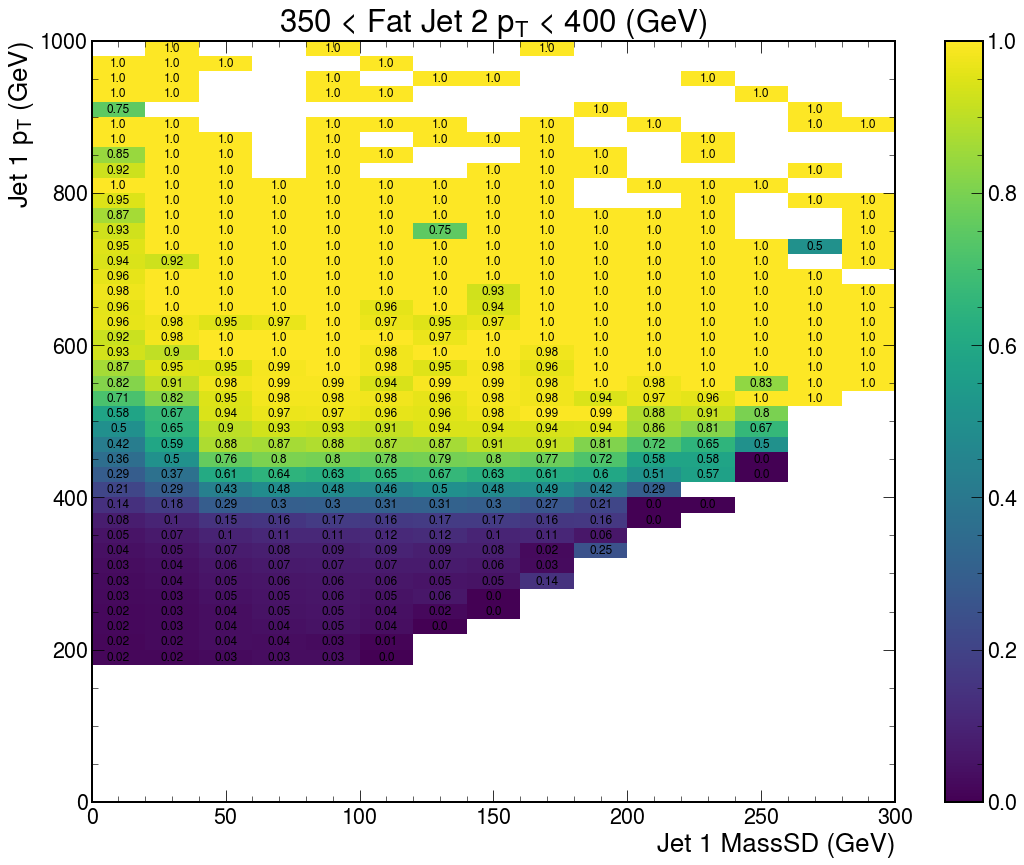

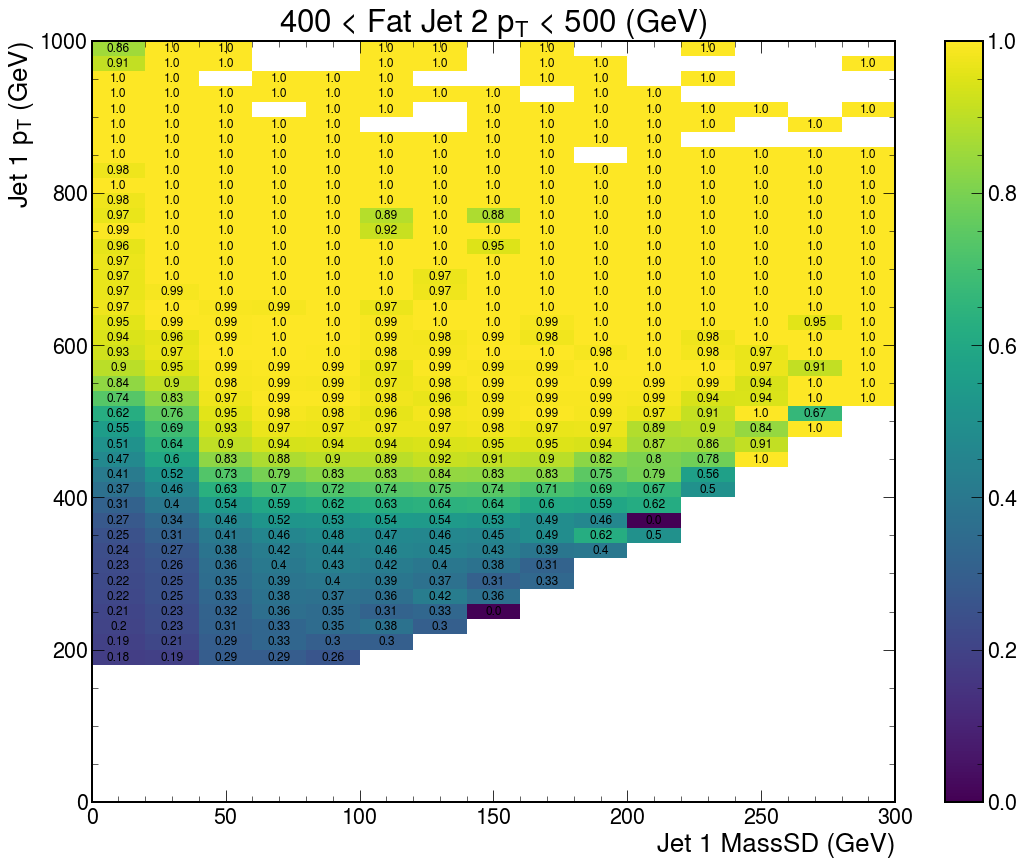

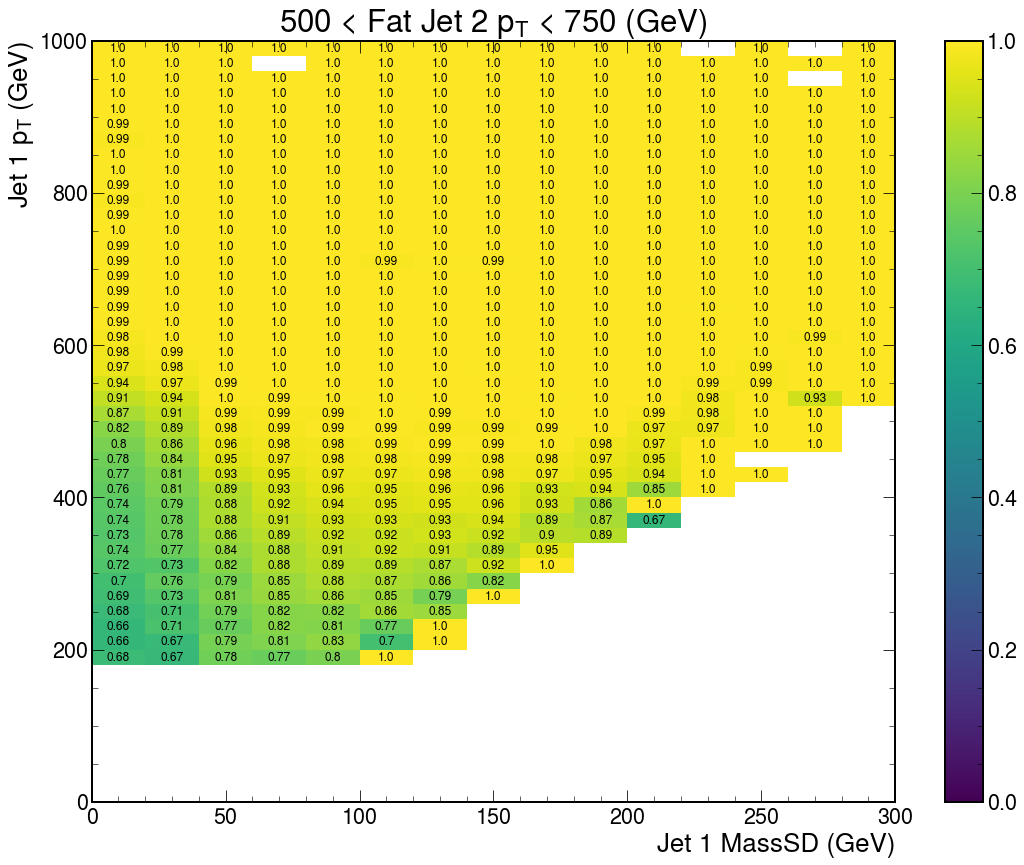

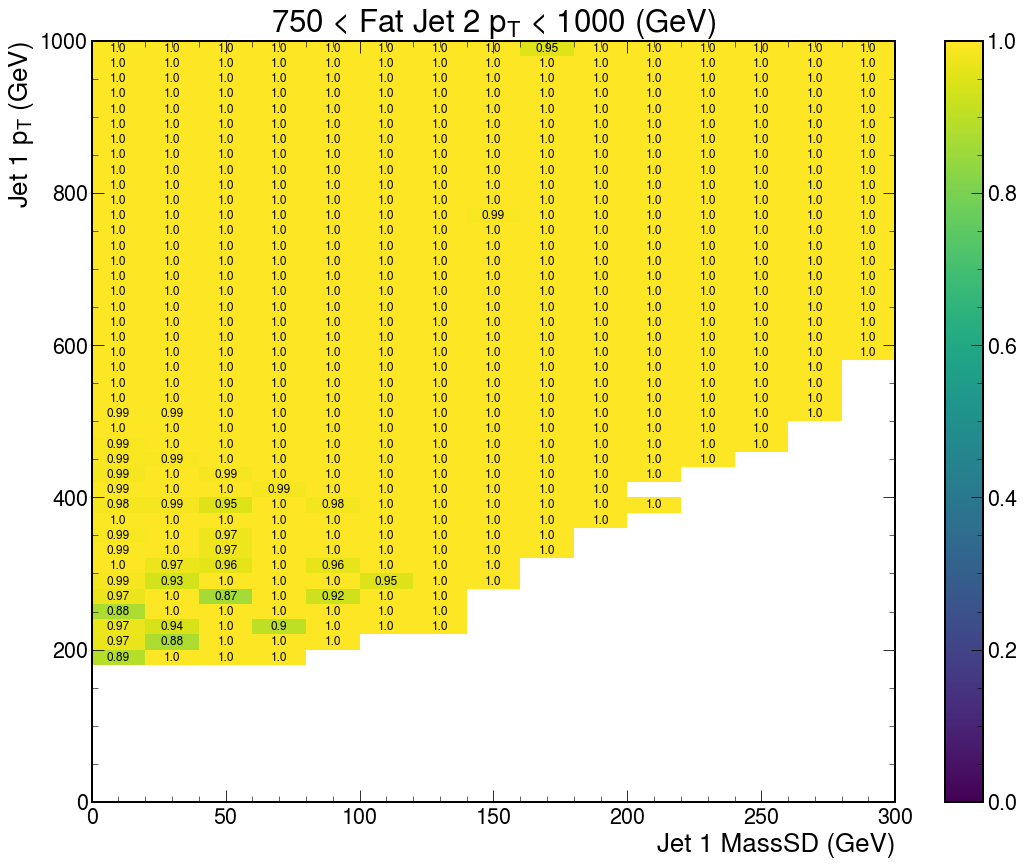

In [15]:
import math

w, jet2ptbins, jet1ptbins, jet1msdbins = effs.to_numpy()

for k in range(len(jet2ptbins) - 1):
    fig, ax = plt.subplots(figsize=(18, 14))
    mesh = ax.pcolormesh(jet1msdbins, jet1ptbins, w[k], cmap="viridis", vmin=0, vmax=1)
    for i in range(len(jet1ptbins) - 1):
        for j in range(len(jet1msdbins) - 1):
            if not math.isnan(w[k][i, j]):
                ax.text(
                    (jet1msdbins[j] + jet1msdbins[j + 1]) / 2,
                    (jet1ptbins[i] + jet1ptbins[i + 1]) / 2,
                    w[k][i, j].round(2),
                    color="black",
                    ha="center",
                    va="center",
                    fontsize=12,
                )

    ax.set_title(f"{jet2ptbins[k]:.0f} < Fat Jet 2 $p_T$ < {jet2ptbins[k + 1]:.0f} (GeV)")
    ax.set_xlabel("Jet 1 MassSD (GeV)")
    ax.set_ylabel("Jet 1 $p_T$ (GeV)")
    plt.colorbar(mesh, ax=ax)
    plt.savefig(f"../corrections/trigEffs/Hybrid3D/AK15Hybrid3DTriggerEfficiencies_Bin{k}.pdf")

In [2]:
import pickle

with open("../corrections/trigEffs/AK15JetHTTriggerEfficiency_2017_2.hist", "rb") as filehandler:
    effs = pickle.load(filehandler)

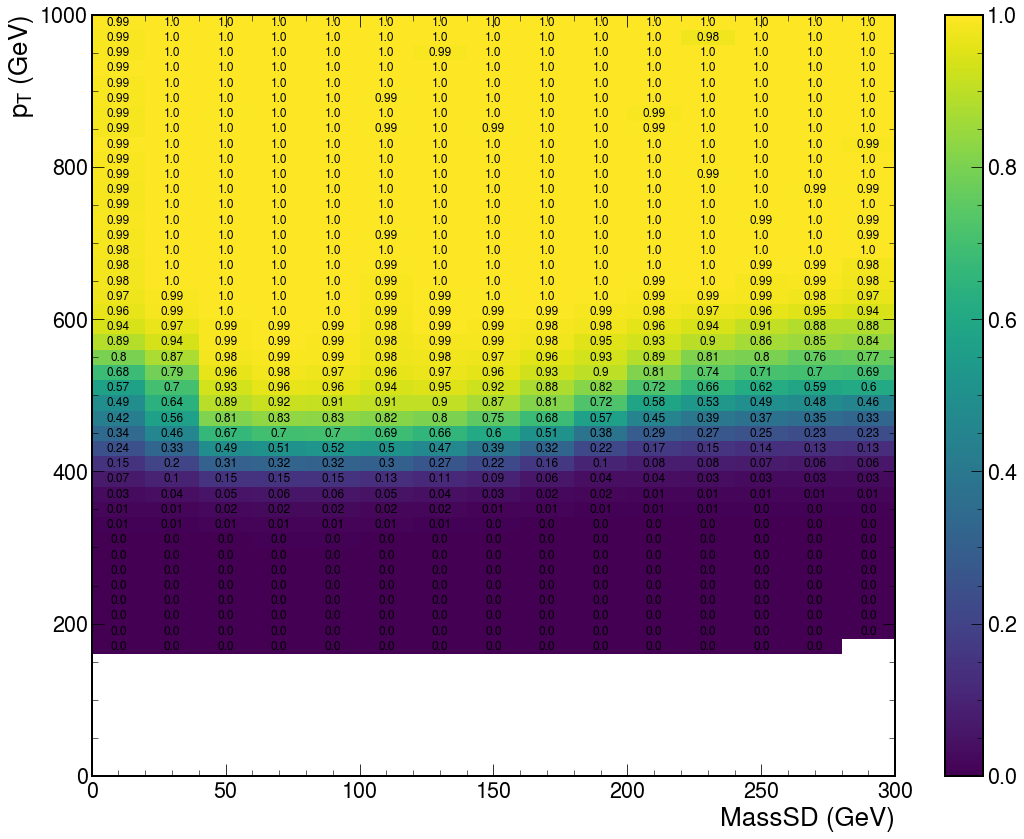

In [5]:
import math

w, ptbins, msdbins = effs.to_numpy()

fig, ax = plt.subplots(figsize=(18, 14))
mesh = ax.pcolormesh(msdbins, ptbins, w, cmap="viridis")
for i in range(len(ptbins) - 1):
    for j in range(len(msdbins) - 1):
        if not math.isnan(w[i, j]):
            ax.text(
                (msdbins[j] + msdbins[j + 1]) / 2,
                (ptbins[i] + ptbins[i + 1]) / 2,
                w[i, j].round(2),
                color="black",
                ha="center",
                va="center",
                fontsize=12,
            )
ax.set_xlabel("MassSD (GeV)")
ax.set_ylabel("$p_T$ (GeV)")
fig.colorbar(mesh)
# plt.savefig("../corrections/trigEffs/plots/AK8JetHTTriggerEfficiencies.pdf")